# Hola Alan! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo Alan, en general tu notebook está muy bien con respuestas muy completas. Hay algunas partes que debes mejorar, como algunos gráficos y debes corregir el cálculo del CAC. El ROMI lo revisaré en la siguiente iteración cuando el CAC esté listo. Revisa los comentarios que dejé, cualquier duda me la puedes dejar en un recuadro azul.
    
Saludos!    

</div>

----

# INTRODUCCIÓN

Para el presente proyecto, supondremos que han ofrecido hacer prácticas en el departamento analítico de Y.Afisha. Nuestra primera tarea es ayudar a optimizar los gastos de marketing.

En nuestros datos deberemos buscar y encontrar: cómo los clientes usan el servicio; cuándo empiezan a comprar; cuánto dinero aporta cada cliente a la compañía;cuándo los ingresos cubren el costo de adquisición de los clientes.



## Paso 1. Descarga los datos y prepáralos para el análisis

Optimizaremos los datos para el análisis. Asegurémonos de que cada columna contenga el tipo de datos correcto.

In [1]:
#Importamos las librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Optimización de datos.

In [2]:
#Extraemos una muestra de cada Dataset para conocer los tipos de datos que tienen en sus columnas y después optimizarlos 

df_test_visits= pd.read_csv('/datasets/visits_log_us.csv', nrows=500)
df_test_orders= pd.read_csv('/datasets/orders_log_us.csv', nrows=500)
df_test_costs= pd.read_csv('/datasets/costs_us.csv', nrows=500)

In [3]:
df_test_visits.info(memory_usage='deep')
print()
df_test_orders.info(memory_usage='deep')
print()
df_test_costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  50

In [4]:
#Imprimimos las primeras filas para ver el formato de fechas que emplearemos

print(df_test_visits.head(5))
print()
print(df_test_orders)
print()
print(df_test_costs)

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  

                  Buy Ts  Revenue                   Uid
0    2017-06-01 00:10:00    17.00  10329302124590727494
1    2017-06-01 00:25:00     0.55  11627257723692907447
2    2017-06-01 00:27:00     0.37  17903680561304213844
3    2017-06-01 00:29:00     0.55  16109239769442553005
4    2017-06-01 07:58:00     0.37  14200605875248379450
..                   ...      ...                   ...
495  2017-06-05 23:18:00     2.32  1566057667818

In [5]:
#Revisamos el número de valores únicos para las columnas necesarias en los datasets 

df_test_visits['Device'].value_counts()

desktop    363
touch      137
Name: Device, dtype: int64

Convertiremos las columnas con pocos valores únicos en el tipo de dato "category" y las fechas el formato necesario con el parámetro to_datetime al momento de descargar la información completa.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, correcto. Acerca de extraer las primeras 500 filas, solo es necesario cuando los datos son muy grandes.

</div>

### Descarga de datos con el tipo de datos adecuado

In [6]:
df_visits= pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'] )
df_orders= pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
df_costs= pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])

In [7]:
#Verificamos los datos

df_visits.info(memory_usage='deep')
print()
df_orders.info(memory_usage='deep')
print()
df_costs.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 t

In [8]:
df_visits.columns = df_visits.columns.str.replace(' ', '_').str.lower()
df_orders.columns = df_orders.columns.str.replace(' ', '_').str.lower()
df_costs.columns = df_costs.columns.str.replace(' ', '_').str.lower()

In [9]:
#verificamos los cambios
print(df_visits.head(5))
print()
print(df_orders)
print()
print(df_costs)

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  

                   buy_ts  revenue                   uid
0     2017-06-01 00:10:00    17.00  10329302124590727494
1     2017-06-01 00:25:00     0.55  11627257723692907447
2     2017-06-01 00:27:00     0.37  17903680561304213844
3     2017-06-01 00:29:00     0.55  16109239769442553005
4     2017-06-01 07:58:00     0.37  14200605875248379450
...                   ...      ...                   ...
50410 2018-05-31 23:50:00     4.64  12296626599487328

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien con la revisión de datos y el uso de snakecase

</div>

## Paso 2. Haz informes y calcula métricas 

### Visitas:

In [10]:
# Agregamos columnas de fecha para facilitar el agrupamiento
df_visits['date'] = df_visits['start_ts'].dt.date
df_visits['week'] = df_visits['start_ts'].astype('datetime64[W]')
df_visits['month'] = df_visits['start_ts'].astype('datetime64[M]')

In [11]:
print(df_visits)

         device              end_ts  source_id            start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
...         ...                 ...        ...                 ...   
359395  desktop 2017-07-29 19:07:19          2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         uid        date       week      month  
0       16879256277535980062  2017-12-20 2017-12-14 2017-12-01  
1         104060357244891740 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, pero ojo que para semanas y meses, hay que incluir el año si se agrupan o grafican para poder distinguir semanas y meses de años diferentes.

</div>

<div class="alert alert-block alert-info">
<b>Listo.</b> <a class="tocSkip"></a>
</div>

In [12]:
#df_visits['month'] = df_visits['start_ts'].dt.month
#print(df_visits.head())

In [13]:
# Usuarios únicos por día
users_per_day = df_visits.groupby('date')['uid'].nunique()

# Usuarios únicos por semana
users_per_week = df_visits.groupby('week')['uid'].nunique()

# Usuarios únicos por mes
users_per_month = df_visits.groupby('month')['uid'].nunique()

In [14]:
print("Usuarios únicos por día:")
print(users_per_day.head())
print()
print("Usuarios únicos por semana:")
print(users_per_week.head())
print()
print("Usuarios únicos por mes:")
print(users_per_month.head())

Usuarios únicos por día:
date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: uid, dtype: int64

Usuarios únicos por semana:
week
2017-06-01    4082
2017-06-08    3311
2017-06-15    2844
2017-06-22    3079
2017-06-29    3055
Name: uid, dtype: int64

Usuarios únicos por mes:
month
2017-06-01    13259
2017-07-01    14183
2017-08-01    11631
2017-09-01    18975
2017-10-01    29692
Name: uid, dtype: int64


In [15]:
#Obtenemos las medias(promedios) para cada unidad de medida de tiempo

print('Promedio de usuarios únicos por día:', users_per_day.mean())
print('Promedio de usuarios únicos por semana:', users_per_week.mean())
print('Promedio de usuarios únicos por mes:', users_per_month.mean())


Promedio de usuarios únicos por día: 907.9917582417582
Promedio de usuarios únicos por semana: 5724.415094339623
Promedio de usuarios únicos por mes: 23228.416666666668


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, correcto
</div>

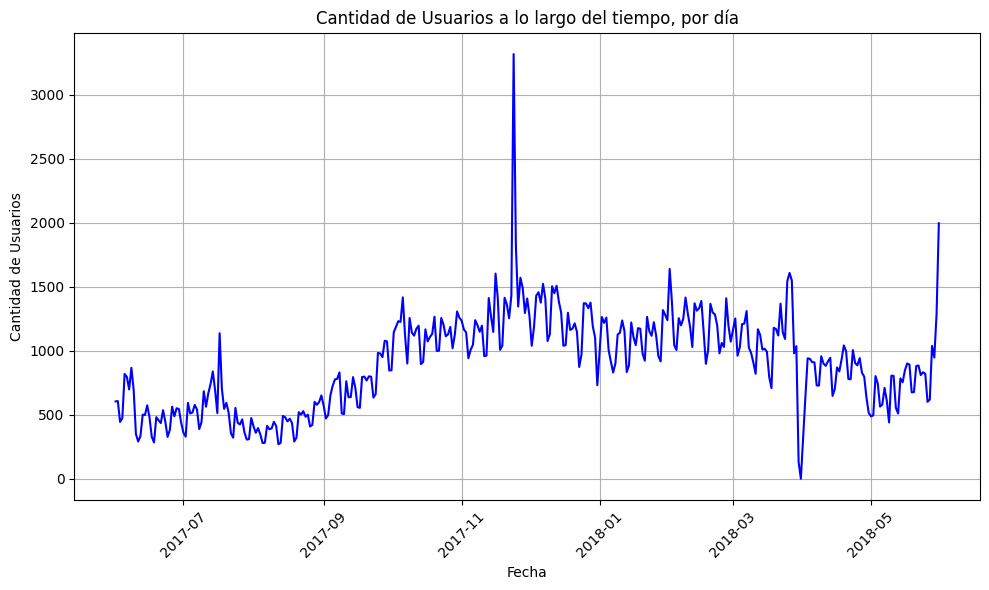

In [16]:
#Trazamos el gráfico

# Gráfico de línea de usuarios únicos por día
plt.figure(figsize=(10, 6))
plt.plot(users_per_day, linestyle='-', color='b')
plt.title('Cantidad de Usuarios a lo largo del tiempo, por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Usuarios')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

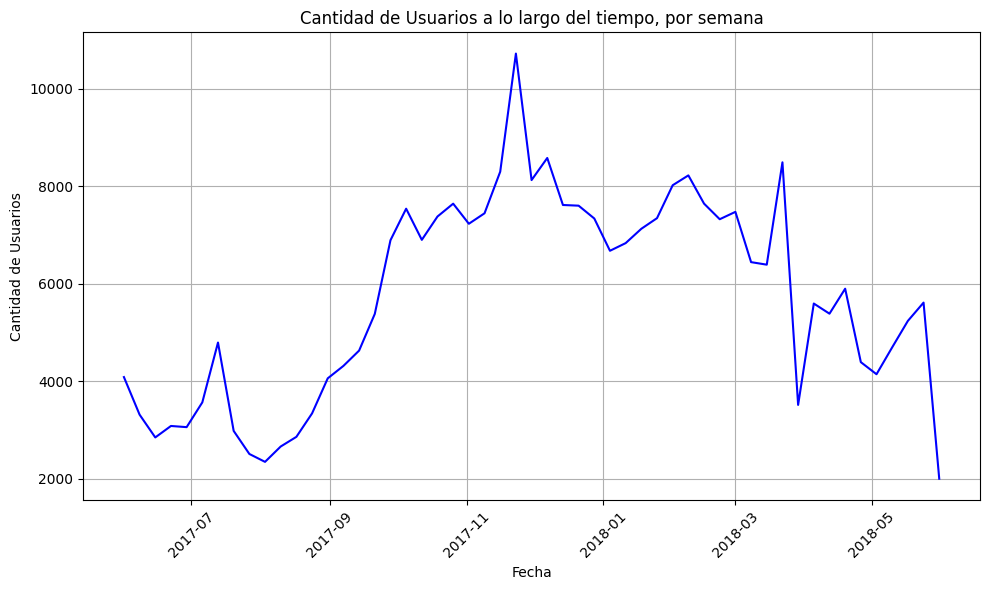

In [17]:
#Trazamos el gráfico

# Gráfico de línea de usuarios únicos por semana
plt.figure(figsize=(10, 6))
plt.plot(users_per_week, linestyle='-', color='b')
plt.title('Cantidad de Usuarios a lo largo del tiempo, por semana')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Usuarios')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

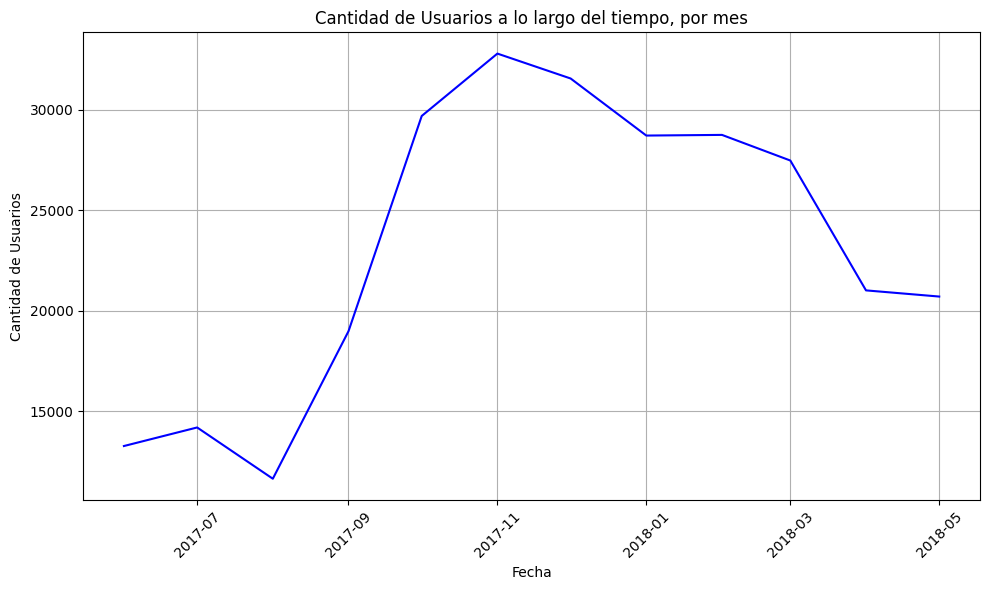

In [18]:
#Trazamos el gráfico

# Gráfico de línea de usuarios únicos por mes
plt.figure(figsize=(10, 6))
plt.plot(users_per_month, linestyle='-', color='b')
plt.title('Cantidad de Usuarios a lo largo del tiempo, por mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Usuarios')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, pero estos gráficos no indican mucha información de los usuarios en esos periodos de tiempo, idealmente deberías mostrar un gráfico de cantidad de usuarios a lo largo del tiempo, realiza un gráfico de línea para cada medida de tiempo, con el tiempo en el eje x y la cantidad de usuarios en el eje y
</div>

<div class="alert alert-block alert-info">
<b>Ok, se ve mejor y se entiende mejor.</b> <a class="tocSkip"></a>
</div>

In [19]:
# Sesiones por día
sessions_per_day = df_visits.groupby('date')['uid'].count()

print("Sesiones por día:")
print(sessions_per_day.head())

Sesiones por día:
date
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: uid, dtype: int64


In [20]:
# Contar el número de sesiones por usuario por día
sessions_per_user_per_day = df_visits.groupby(['date', 'uid']).size()


#Obtenemos la media(promedio)

print('Promedio de sesiones por usuario por día:', sessions_per_user_per_day.mean())


Promedio de sesiones por usuario por día: 1.0874136559064957


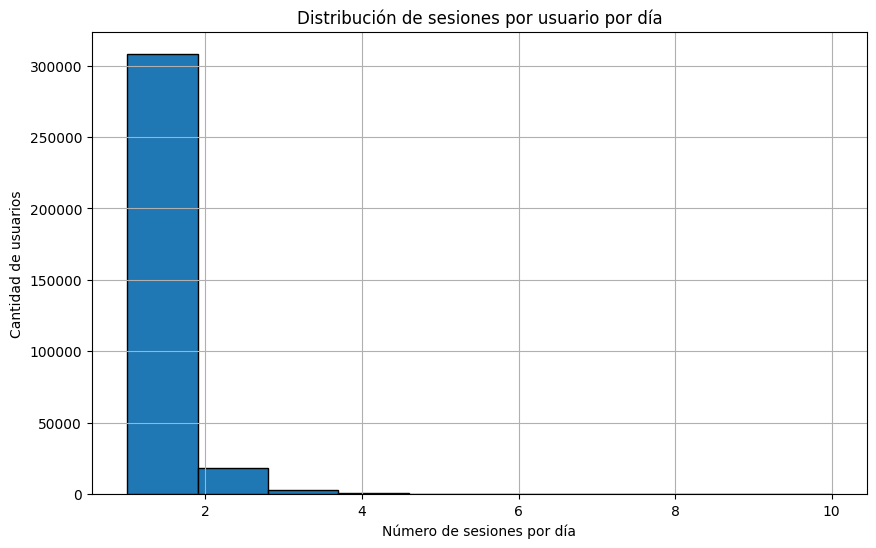

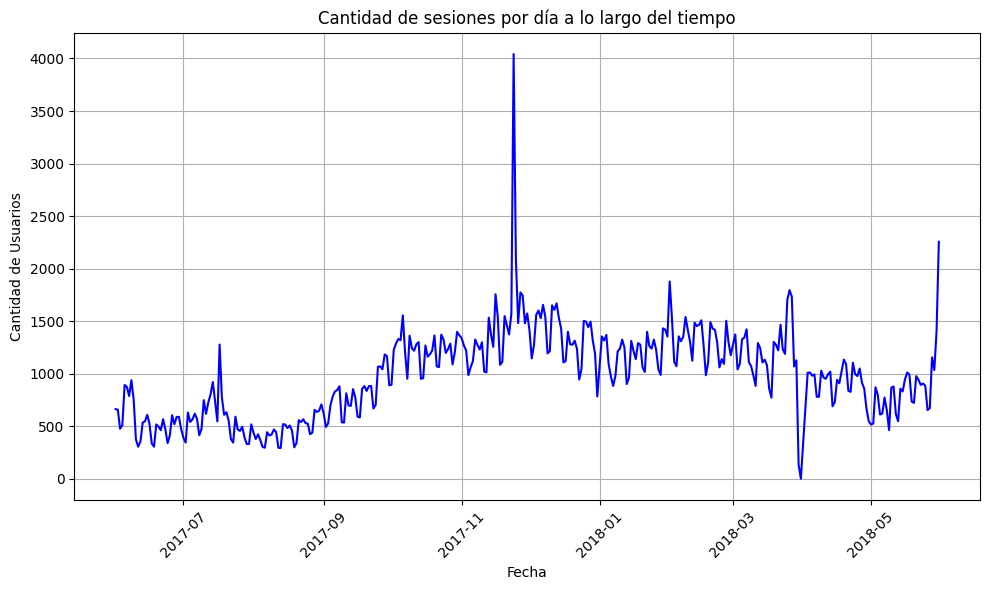

In [21]:
#Trazamos histograma



# Crear un histograma de la cantidad de usuarios por número de sesiones por día
plt.figure(figsize=(10, 6))
plt.hist(sessions_per_user_per_day, bins=10, edgecolor='k')
plt.title('Distribución de sesiones por usuario por día')
plt.xlabel('Número de sesiones por día')
plt.ylabel('Cantidad de usuarios')
plt.grid(True)
plt.show()


#Trazamos el gráfico

# Gráfico de línea de usuarios únicos por día
plt.figure(figsize=(10, 6))
plt.plot(sessions_per_day, linestyle='-', color='b')
plt.title('Cantidad de sesiones por día a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Usuarios')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Mismo comentario de la parte anterior, aunque tal vez en este caso si es útil dado que el único valor que se repite mucho es 1 y 2, por lo tanto, el comportamiento es muy similar al de usuarios. De todas formas agrega el gráfico de sesiones a lo largo del  tiempo.
</div>

<div class="alert alert-block alert-info">
<b>Listo.</b> <a class="tocSkip"></a>
</div>

In [22]:
# Calculamos la duración de cada sesión en segundos
df_visits['session_duration'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.total_seconds()

print("Duración de cada sesión (en segundos):")
print(df_visits[['uid', 'start_ts', 'end_ts', 'session_duration']].head())

Duración de cada sesión (en segundos):
                    uid            start_ts              end_ts  \
0  16879256277535980062 2017-12-20 17:20:00 2017-12-20 17:38:00   
1    104060357244891740 2018-02-19 16:53:00 2018-02-19 17:21:00   
2   7459035603376831527 2017-07-01 01:54:00 2017-07-01 01:54:00   
3  16174680259334210214 2018-05-20 10:59:00 2018-05-20 11:23:00   
4   9969694820036681168 2017-12-27 14:06:00 2017-12-27 14:06:00   

   session_duration  
0            1080.0  
1            1680.0  
2               0.0  
3            1440.0  
4               0.0  


Podemos notar que hay filas en las que la duración indica 0 segundos, investiguemos más al respecto.Pudiera tratarse de un error en los registros.

In [23]:
#Obtenemos número de registros con valor 0 en la duración de sesión

print('Registros con valor 0:' , df_visits[df_visits['session_duration']==0]['session_duration'].count())
print('Registros con valor numérico:' ,df_visits[df_visits['session_duration']!=0]['session_duration'].count())


Registros con valor 0: 35794
Registros con valor numérico: 323606


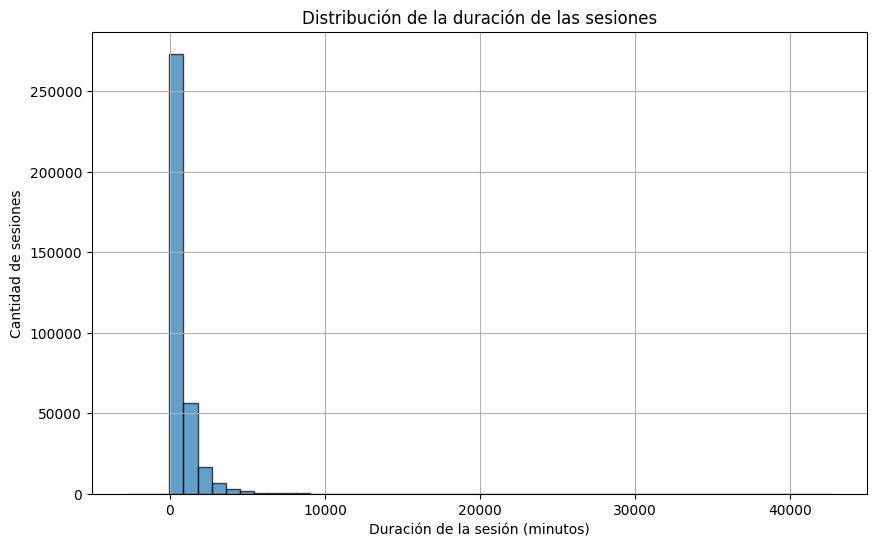

In [24]:
# Crear un histograma de la duración de las sesiones
plt.figure(figsize=(10, 6))
plt.hist(df_visits['session_duration'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribución de la duración de las sesiones')
plt.xlabel('Duración de la sesión (minutos)')
plt.ylabel('Cantidad de sesiones')
plt.grid(True)
plt.show()

Vemos que la frecuencia mayor es 0, ahora intentemos hacerlo sin los valores 0.

In [25]:
session_duration_fixed = df_visits[df_visits['session_duration']!=0]


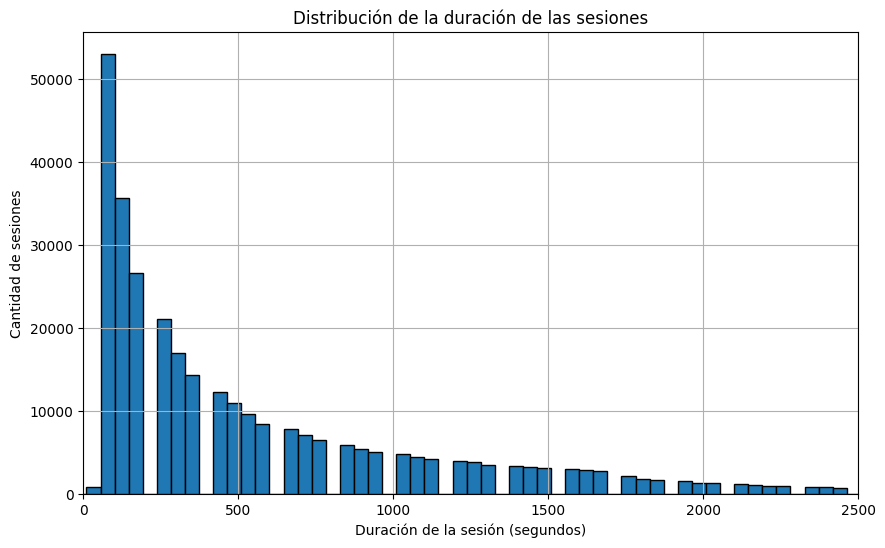

In [26]:
# Crear un histograma de la duración de las sesiones
plt.figure(figsize=(10, 6))
plt.hist(session_duration_fixed['session_duration'], bins=1000, edgecolor='k')
plt.xlim([0, 2500])
plt.title('Distribución de la duración de las sesiones')
plt.xlabel('Duración de la sesión (segundos)')
plt.ylabel('Cantidad de sesiones')
plt.grid(True)
plt.show()

Al no ser una distribución normal, calcularemos como nuestra ASL, la moda.

In [27]:
print(df_visits['session_duration'].mode())

0    60.0
dtype: float64


La duración más habitual por sesión es de 60 segundos.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente, muy completa la respuesta a esta pregunta
</div>

In [28]:
# Ordenar por usuario y por inicio de sesión
df_visits = df_visits.sort_values(by=['uid', 'start_ts'])

# Calcular la diferencia de tiempo entre sesiones consecutivas para cada usuario
df_visits['previous_session_end_ts'] = df_visits.groupby('uid')['end_ts'].shift()
df_visits['time_since_last_session'] = (df_visits['start_ts'] - df_visits['previous_session_end_ts']).dt.total_seconds() / (60 * 60 * 24)  # Convertir a días

# Promedio de días entre sesiones para cada usuario
average_return_frequency = df_visits.groupby('uid')['time_since_last_session'].mean().dropna()

print("Frecuencia de retorno promedio (en días):")
print(average_return_frequency.head())

Frecuencia de retorno promedio (en días):
uid
313578113262317      86.877431
325320750514679     148.913194
526778907996220      55.906713
577434573913691       6.161111
1260655184775459     43.310880
Name: time_since_last_session, dtype: float64


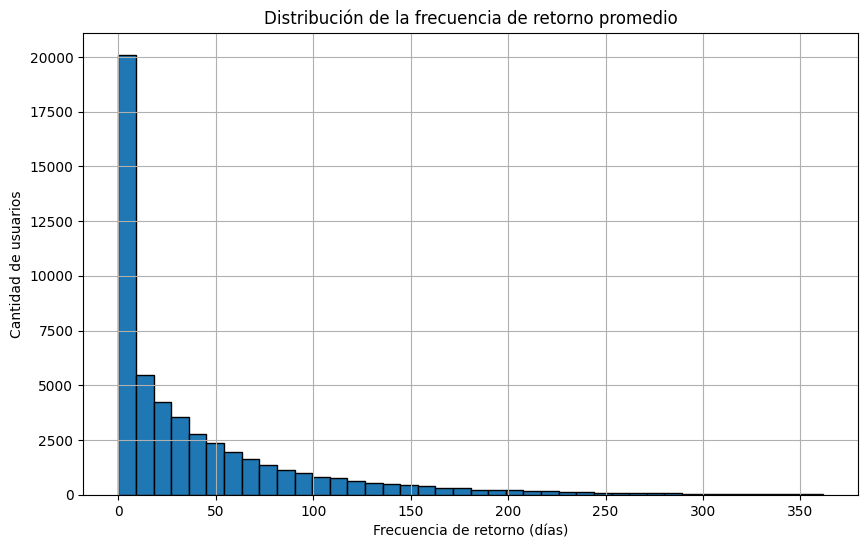

In [29]:
import matplotlib.pyplot as plt

# Crear un histograma de la frecuencia de retorno promedio
plt.figure(figsize=(10, 6))
plt.hist(average_return_frequency, bins=40, edgecolor='k')
plt.title('Distribución de la frecuencia de retorno promedio')
plt.xlabel('Frecuencia de retorno (días)')
plt.ylabel('Cantidad de usuarios')
plt.grid(True)
plt.show()

Se parece mucho al histograma de la duración de la sesión. Esto nos dice que los usuarios que continuan activos, no esperan demasiado para volver a entrar al sitio.

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, pero esto muestra el tiempo de retorno de los que vuelven a comprar, ¿qué porcentaje no vuelve a comprar? Una forma simple de ver qué tanto vuelven semanal o mensualmente los usuarios es el factor de stickyness, también puedes agregarlo.
</div>

<div class="alert alert-block alert-info">
<b>Lo abordamos a continuación:</b> <a class="tocSkip"></a>
</div>

In [30]:
# Contar el número de compras por usuario
purchase_counts = df_orders.groupby('uid').size().reset_index(name='purchase_count')

# Calcular el número de usuarios con una única compra y con más de una compra
one_time_buyers = purchase_counts[purchase_counts['purchase_count'] == 1].shape[0]
repeat_buyers = purchase_counts[purchase_counts['purchase_count'] > 1].shape[0]
total_buyers = one_time_buyers + repeat_buyers

# Calcular el porcentaje de usuarios que no vuelven a comprar
percentage_one_time_buyers = (one_time_buyers / total_buyers) * 100

# Calcular el factor de stickiness
stickiness_factor = (repeat_buyers / total_buyers) * 100

# Resultados
print(f"Porcentaje de usuarios que no vuelven a comprar: {percentage_one_time_buyers:.2f}%")
print(f"Factor de stickiness: {stickiness_factor:.2f}%")

Porcentaje de usuarios que no vuelven a comprar: 82.77%
Factor de stickiness: 17.23%


Este es nuestro panorama total, intentemos hacerlo mensualmente:

In [31]:
# Extraer mes y año de las fechas de compra
df_orders['month'] = df_orders['buy_ts'].dt.to_period('M')

# Contar el número de compras por usuario y por mes
purchase_counts_monthly = df_orders.groupby(['month', 'uid']).size().reset_index(name='purchase_count')

# Calcular el número de usuarios con una única compra y con más de una compra por mes
one_time_buyers_monthly = purchase_counts_monthly[purchase_counts_monthly['purchase_count'] == 1].groupby('month').size()
repeat_buyers_monthly = purchase_counts_monthly[purchase_counts_monthly['purchase_count'] > 1].groupby('month').size()
total_buyers_monthly = purchase_counts_monthly.groupby('month').size()

# Calcular el porcentaje de usuarios que no vuelven a comprar y el factor de stickiness por mes
monthly_stats = pd.DataFrame({
    'one_time_buyers': one_time_buyers_monthly,
    'repeat_buyers': repeat_buyers_monthly,
    'total_buyers': total_buyers_monthly
})

monthly_stats['percentage_one_time_buyers'] = (monthly_stats['one_time_buyers'] / monthly_stats['total_buyers']) * 100
monthly_stats['stickiness_factor'] = (monthly_stats['repeat_buyers'] / monthly_stats['total_buyers']) * 100

# Rellenar NaN con 0 para meses donde no hubo compras repetidas
monthly_stats = monthly_stats.fillna(0)

# Resultados
print(monthly_stats[['percentage_one_time_buyers', 'stickiness_factor']])

         percentage_one_time_buyers  stickiness_factor
month                                                 
2017-06                   88.334157          11.665843
2017-07                   88.659274          11.340726
2017-08                   89.402174          10.597826
2017-09                   88.618182          11.381818
2017-10                   88.171123          11.828877
2017-11                   85.572905          14.427095
2017-12                   87.636584          12.363416
2018-01                   90.046178           9.953822
2018-02                   89.220291          10.779709
2018-03                   85.816790          14.183210
2018-04                   90.998542           9.001458
2018-05                   92.127540           7.872460
2018-06                  100.000000           0.000000


Podemos observar que el stickiness factor es pequeño en comparación de todas las ventas que se hacen de forma mensual. Probablemente habría que revisar la tasa de retención.

In [32]:
print(df_orders.head())

               buy_ts  revenue                   uid    month
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06


In [33]:
first_activity_month = df_orders.groupby(['uid'])['month'].min()
first_activity_month.name = 'first_activity_month'
user_activity_by_month = df_orders.join(first_activity_month, on='uid')

# Calcular la vida útil del cohorte
user_activity_by_month['cohort_lifetime'] = (
    user_activity_by_month['month'] - user_activity_by_month['first_activity_month']
).apply(lambda x: x.n)

# Resultados
print(user_activity_by_month.head())

               buy_ts  revenue                   uid    month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06   

  first_activity_month  cohort_lifetime  
0              2017-06                0  
1              2017-06                0  
2              2017-06                0  
3              2017-06                0  
4              2017-06                0  


In [34]:
cohorts_user_return = (
    user_activity_by_month.groupby(['first_activity_month', 'cohort_lifetime'])
    .agg({'uid': 'nunique'})
    .reset_index()
)

In [35]:
#Vamos a buscar el número inicial de usuarios/as en la cohorte observando el mes 0
initial_users_count = cohorts_user_return[cohorts_user_return['cohort_lifetime'] == 0][
    ['first_activity_month', 'uid']
]

initial_users_count = initial_users_count.rename(
    columns={'uid': 'cohort_users'}
)

print(initial_users_count)

   first_activity_month  cohort_users
0               2017-06          2023
12              2017-07          1923
23              2017-08          1370
33              2017-09          2581
42              2017-10          4340
50              2017-11          4081
57              2017-12          4383
63              2018-01          3373
68              2018-02          3651
72              2018-03          3533
75              2018-04          2276
77              2018-05          2988
78              2018-06             1


In [36]:
cohorts_user_return = cohorts_user_return.merge(initial_users_count, on='first_activity_month')

In [37]:
#calculamos la tasa de retención
cohorts_user_return['retention'] = cohorts_user_return['uid'] / cohorts_user_return['cohort_users']

<AxesSubplot:title={'center':'Cohortes: retención de usuarios/as'}, xlabel='cohort_lifetime', ylabel='first_activity_month'>

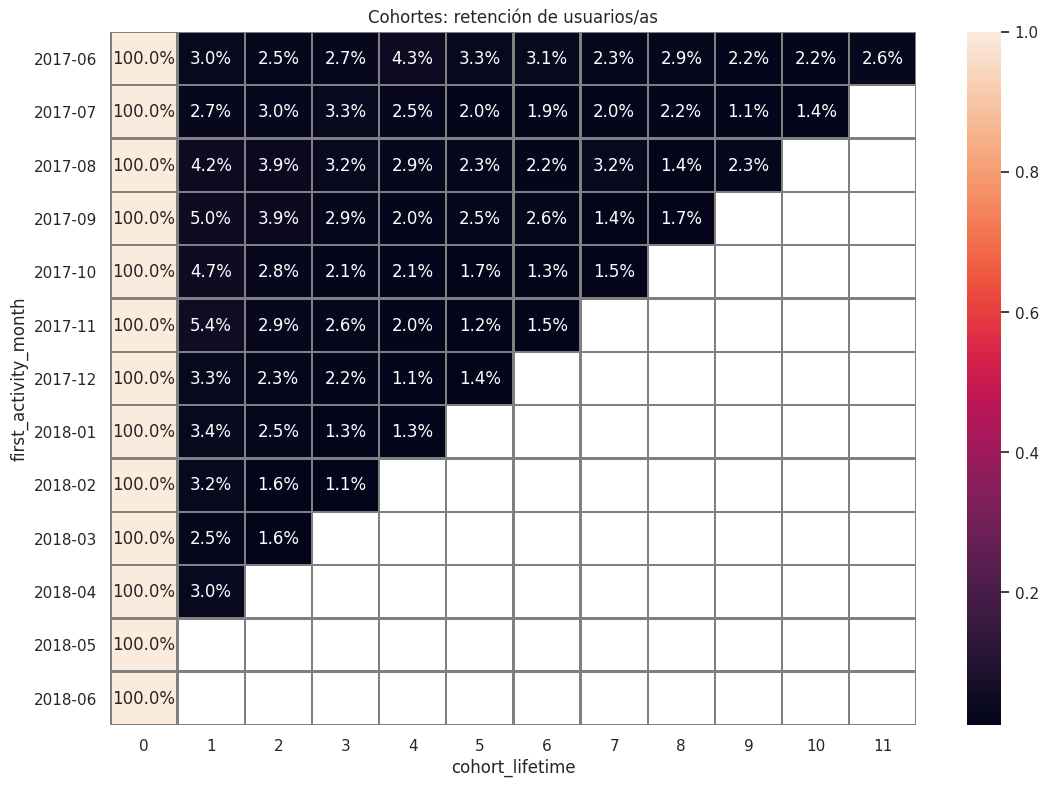

In [38]:
#Creamos una tabla dinámica para calcular la tasa de retención para todas las cohortes y lo mostramos como un mapa de calor

retention_pivot = cohorts_user_return.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)


sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: retención de usuarios/as')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'
)

Como lo habíamos observado previamente, la tasa de retención es muy baja.

### Ventas:

#### ¿Cuándo la gente empieza a comprar?

In [39]:
print(df_visits.head())
print(df_orders.head())

         device              end_ts  source_id            start_ts  \
196543    touch 2018-03-01 17:33:00          3 2018-03-01 17:27:00   
257333    touch 2018-02-06 15:57:00          2 2018-02-06 15:55:00   
173818  desktop 2017-06-07 18:48:00          3 2017-06-07 18:47:00   
173142  desktop 2017-09-18 23:07:00          2 2017-09-18 22:49:00   
192554  desktop 2018-02-18 15:26:00          2 2018-02-18 15:17:00   

                    uid        date       week      month  session_duration  \
196543   11863502262781  2018-03-01 2018-03-01 2018-03-01             360.0   
257333   49537067089222  2018-02-06 2018-02-01 2018-02-01             120.0   
173818  297729379853735  2017-06-07 2017-06-01 2017-06-01              60.0   
173142  313578113262317  2017-09-18 2017-09-14 2017-09-01            1080.0   
192554  313578113262317  2018-02-18 2018-02-15 2018-02-01             540.0   

       previous_session_end_ts  time_since_last_session  
196543                     NaT                

In [40]:
# Identificar la primera visita de cada usuario
first_visits = df_visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_visits.columns = ['uid', 'first_visit']


# Identificar la primera compra de cada usuario
first_orders = df_orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_orders.columns = ['uid', 'first_order']

In [41]:
first_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228169 entries, 0 to 228168
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   uid          228169 non-null  uint64        
 1   first_visit  228169 non-null  datetime64[ns]
dtypes: datetime64[ns](1), uint64(1)
memory usage: 3.5 MB


In [42]:
first_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   uid          36523 non-null  uint64        
 1   first_order  36523 non-null  datetime64[ns]
dtypes: datetime64[ns](1), uint64(1)
memory usage: 570.8 KB


In [43]:
# Combinar la primera visita y la primera compra en un solo DataFrame
user_lifecycle = pd.merge(first_visits, first_orders, on='uid', how='left')

# Calcular el tiempo entre el primer registro y la primera compra (en días)
user_lifecycle['weeks_to_conversion'] = (user_lifecycle['first_order'] - user_lifecycle['first_visit']).dt.days // 7


In [44]:
print(user_lifecycle['weeks_to_conversion'].value_counts())

0.0     29225
1.0      1024
2.0       702
3.0       478
4.0       412
5.0       350
6.0       298
7.0       291
8.0       276
9.0       230
10.0      224
12.0      195
17.0      192
11.0      190
13.0      188
16.0      170
14.0      169
15.0      148
22.0      126
18.0      125
19.0      125
21.0      114
20.0      109
24.0      107
25.0      102
23.0       88
27.0       83
26.0       74
28.0       72
31.0       67
29.0       59
32.0       55
33.0       47
34.0       46
30.0       44
36.0       42
37.0       33
35.0       30
41.0       29
38.0       28
39.0       25
42.0       19
40.0       19
49.0       18
45.0       18
46.0       14
43.0        9
47.0        9
50.0        7
51.0        6
48.0        6
44.0        6
Name: weeks_to_conversion, dtype: int64


In [45]:
#Estudiamos la muestra de nuestro DataFrame

print(user_lifecycle.head(10))

               uid         first_visit         first_order  \
0   11863502262781 2018-03-01 17:27:00                 NaT   
1   49537067089222 2018-02-06 15:55:00                 NaT   
2  297729379853735 2017-06-07 18:47:00                 NaT   
3  313578113262317 2017-09-18 22:49:00 2018-01-03 21:51:00   
4  325320750514679 2017-09-30 14:29:00                 NaT   
5  397399764396656 2018-01-18 12:32:00                 NaT   
6  407573351275847 2017-06-17 13:40:00                 NaT   
7  498809019029702 2018-02-21 22:09:00                 NaT   
8  526778907996220 2017-10-21 17:51:00                 NaT   
9  577434573913691 2018-01-28 14:15:00                 NaT   

   weeks_to_conversion  
0                  NaN  
1                  NaN  
2                  NaN  
3                 15.0  
4                  NaN  
5                  NaN  
6                  NaN  
7                  NaN  
8                  NaN  
9                  NaN  


Podemos apreciar que hay muchos usuarios que no realizaron ninguna compra todavía.

In [46]:
# Clasificar las conversiones en días
user_lifecycle['conversion_cohort'] = user_lifecycle['weeks_to_conversion'].apply(lambda x: f'Week {x}' if pd.notnull(x) else 'No Conversion')

# Revisar la cantidad de usuarios en cada cohorte
cohort_counts = user_lifecycle['conversion_cohort'].value_counts()
print(cohort_counts)

No Conversion    191646
Week 0.0          29225
Week 1.0           1024
Week 2.0            702
Week 3.0            478
Week 4.0            412
Week 5.0            350
Week 6.0            298
Week 7.0            291
Week 8.0            276
Week 9.0            230
Week 10.0           224
Week 12.0           195
Week 17.0           192
Week 11.0           190
Week 13.0           188
Week 16.0           170
Week 14.0           169
Week 15.0           148
Week 22.0           126
Week 18.0           125
Week 19.0           125
Week 21.0           114
Week 20.0           109
Week 24.0           107
Week 25.0           102
Week 23.0            88
Week 27.0            83
Week 26.0            74
Week 28.0            72
Week 31.0            67
Week 29.0            59
Week 32.0            55
Week 33.0            47
Week 34.0            46
Week 30.0            44
Week 36.0            42
Week 37.0            33
Week 35.0            30
Week 41.0            29
Week 38.0            28
Week 39.0       

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto este cálculo, aunque hubiese estado bien dejarlo por días
</div>

In [47]:
# Identificar el canal de marketing (source_id) de la primera visita de cada usuario
first_visits_with_source = df_visits.sort_values(by=['uid', 'start_ts']).drop_duplicates('uid', keep='first')[['uid', 'source_id']]

# Combinar esta información con el DataFrame de lifecycle
user_lifecycle = pd.merge(user_lifecycle, first_visits_with_source, on='uid', how='left')

# Revisar los primeros registros del DataFrame resultante
print(user_lifecycle.head())

               uid         first_visit         first_order  \
0   11863502262781 2018-03-01 17:27:00                 NaT   
1   49537067089222 2018-02-06 15:55:00                 NaT   
2  297729379853735 2017-06-07 18:47:00                 NaT   
3  313578113262317 2017-09-18 22:49:00 2018-01-03 21:51:00   
4  325320750514679 2017-09-30 14:29:00                 NaT   

   weeks_to_conversion conversion_cohort  source_id  
0                  NaN     No Conversion          3  
1                  NaN     No Conversion          2  
2                  NaN     No Conversion          3  
3                 15.0         Week 15.0          2  
4                  NaN     No Conversion          5  


In [48]:
# Analizar las conversiones por cohorte y por canal de marketing
cohort_by_channel = user_lifecycle.pivot_table(index='source_id', columns='conversion_cohort', values='uid', aggfunc='count', fill_value=0)

# Revisar la tabla de cohortes por canal de marketing
print(cohort_by_channel)

conversion_cohort  No Conversion  Week 0.0  Week 1.0  Week 10.0  Week 11.0  \
source_id                                                                    
1                           6570      2495        85         12          8   
2                          14110      2673       116         27         24   
3                          55643      8319       277         62         54   
4                          62050      8237       294         62         53   
5                          42306      5784       161         39         32   
6                              2         0         0          0          0   
7                             31         1         0          0          0   
9                           5360       587        50         20         16   
10                          5574      1129        41          2          3   

conversion_cohort  Week 12.0  Week 13.0  Week 14.0  Week 15.0  Week 16.0  ...  \
source_id                                                   

Corregimos nuestros datos para graficarlos, eliminando las filas de "No Conversion"

In [49]:
cohort_counts_fixed = user_lifecycle[user_lifecycle['conversion_cohort'] != 'No Conversion']['conversion_cohort'].value_counts().head(12)

print(cohort_counts_fixed)

Week 0.0     29225
Week 1.0      1024
Week 2.0       702
Week 3.0       478
Week 4.0       412
Week 5.0       350
Week 6.0       298
Week 7.0       291
Week 8.0       276
Week 9.0       230
Week 10.0      224
Week 12.0      195
Name: conversion_cohort, dtype: int64


In [50]:
# Analizar las conversiones por cohorte y por canal de marketing
cohort_by_channel_fixed = user_lifecycle[user_lifecycle['conversion_cohort']!= 'No Conversion'].pivot_table(index='source_id', columns='conversion_cohort', values='uid', aggfunc='count', fill_value=0)

# Revisar la tabla de cohortes por canal de marketing
print(cohort_by_channel_fixed)

conversion_cohort  Week 0.0  Week 1.0  Week 10.0  Week 11.0  Week 12.0  \
source_id                                                                
1                      2495        85         12          8          7   
2                      2673       116         27         24         17   
3                      8319       277         62         54         51   
4                      8237       294         62         53         60   
5                      5784       161         39         32         39   
7                         1         0          0          0          0   
9                       587        50         20         16         18   
10                     1129        41          2          3          3   

conversion_cohort  Week 13.0  Week 14.0  Week 15.0  Week 16.0  Week 17.0  ...  \
source_id                                                                 ...   
1                          8          8          8          7          4  ...   
2               

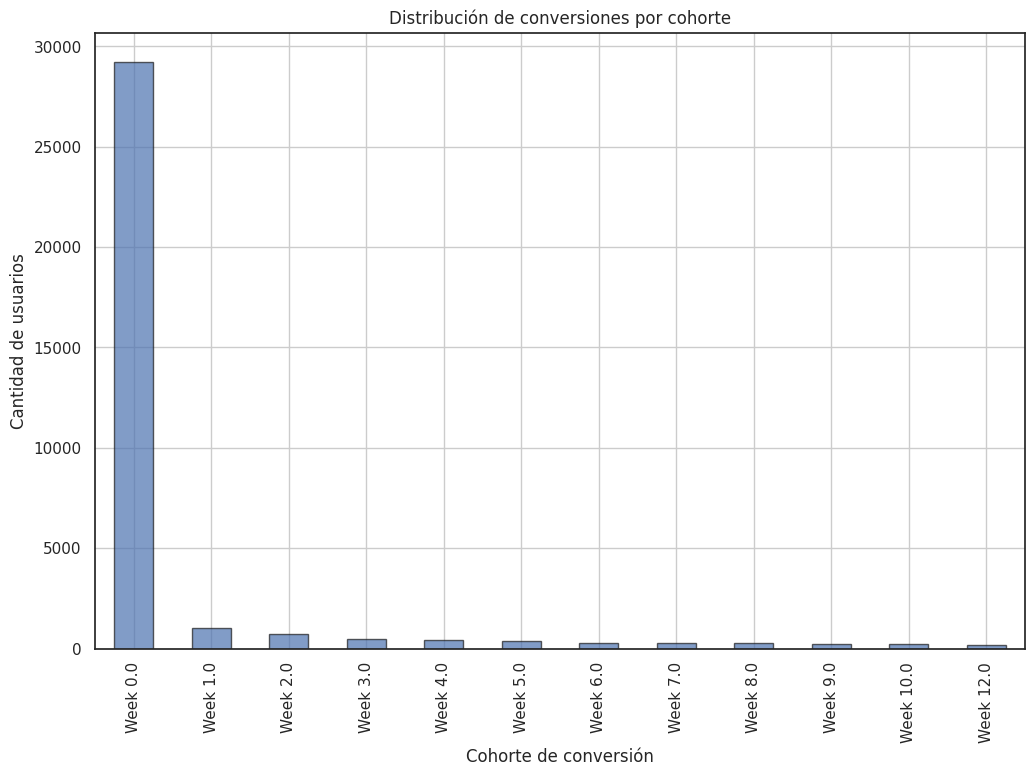

In [51]:
# Visualizar la distribución de las conversiones por cohorte (ordenado por tamaño de cohorte)
plt.figure(figsize=(12, 8))
cohort_counts_fixed.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Distribución de conversiones por cohorte')
plt.xlabel('Cohorte de conversión')
plt.ylabel('Cantidad de usuarios')
plt.grid(True)
plt.show()



Es evidente que la gran mayoría de usuarios, realiza su primera compra dentro de la primera semana después de registrarse.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok muy bien
</div>

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [52]:
# Contar el número de pedidos por día
orders_per_day = df_orders['buy_ts'].dt.date.value_counts().sort_index()

# Contar el número de pedidos por semana
orders_per_week = df_orders['buy_ts'].dt.to_period('W').value_counts().sort_index()

# Contar el número de pedidos por mes
orders_per_month = df_orders['buy_ts'].dt.to_period('M').value_counts().sort_index()

In [53]:
print("Promedio de pedidos por día:\n", orders_per_day.mean())
print("\nPromedio de pedidos por semana:\n", orders_per_week.mean())
print("\nPromedio de pedidos por mes:\n", orders_per_month.mean())


Promedio de pedidos por día:
 138.50274725274724

Promedio de pedidos por semana:
 951.2264150943396

Promedio de pedidos por mes:
 3878.076923076923


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto
</div>

#### ¿Cuál es el tamaño promedio de compra?

In [54]:
# Calcular el tamaño promedio de compra
average_order_size = df_orders['revenue'].mean()

# Mostrar el tamaño promedio de compra
print(f"El tamaño promedio de compra es: ", average_order_size)

El tamaño promedio de compra es:  4.999646930477041


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, esto es un poco simple pero está bien. 
</div>

#### Ahora, calcularemos el LTV.

In [55]:
df_orders.head()

,buy_ts,revenue,uid,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06


In [56]:
# Calcular el LTV (Lifetime Value) por usuario
ltv_per_user = df_orders.groupby('uid')['revenue'].sum()

# Calcular el LTV promedio
average_ltv = ltv_per_user.mean()

# Mostrar el LTV promedio
print(f"El valor de vida promedio del cliente (LTV) es: {average_ltv:.2f}")

El valor de vida promedio del cliente (LTV) es: 6.90


In [57]:
df_orders['buy_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

Tenemos datos de un año. Será mejor hacer cohortes mensuales. Capturemos los meses a partir de las fechas en las tablas de pedidos y costos:

In [58]:
df_orders['order_month'] = df_orders['buy_ts'].astype('datetime64[M]')
#df_costs['month'] = df_costs['dt'].dt.to_period('M')

In [59]:
#Ahora recuperaremos el mes de la primera compra de cada cliente

# Identificar la primera compra de cada usuario
first_orders = df_orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders.columns = ['uid', 'first_order']

# Extraer el mes y el año de la primera compra
first_orders['first_order_month'] = first_orders['first_order'].astype('datetime64[M]')
first_orders['first_order'] = first_orders['first_order'].astype('datetime64[M]')

# Mostrar los primeros registros del DataFrame resultante
print(first_orders.head())

                uid first_order first_order_month
0   313578113262317  2018-01-01        2018-01-01
1  1575281904278712  2017-06-01        2017-06-01
2  2429014661409475  2017-10-01        2017-10-01
3  2464366381792757  2018-01-01        2018-01-01
4  2551852515556206  2017-11-01        2017-11-01


In [60]:
#Calcularemos el número de nuevos clientes (n_buyers) para cada mes:

cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [61]:
#Creemos cohortes. Vamos a agregar los meses de la primera compra de los clientes a la tabla de pedidos

orders_complete = pd.merge(df_orders,first_orders, on='uid')
orders_complete.head()

,buy_ts,revenue,uid,month,order_month,first_order,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06-01,2017-06-01,2017-06-01


In [62]:
#Ahora vamos a agrupar la tabla de pedidos por mes de la primera compra y totalizar los ingresos. 

cohorts = orders_complete.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [63]:
#Agreguemos datos sobre cuántos usuarios realizaron sus primeras compras en cada mes 

report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [64]:
#Calculamos la edad de la cohorte en lugar del mes del pedido

report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month,n_buyers,order_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


In [65]:
#Visualizaremos las cohortes como una tabla dinámica para aclarar las cosas

report['ltv']=report['revenue'] / report['n_buyers']
output = report.pivot_table(index='first_order_month', columns='age', values='ltv')

output.cumsum(axis=1).round(2)



age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.40,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.92,6.99,7.30,7.64,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.88,4.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.51,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observando nuestra tabla pivote, nos damos cuenta que el primer mes en el que nuestros clientes se registran y realizan su primera compra, es en realidad, el mes más importante del cliclo de vida del cliente. Vemos que a partir del segundo mes, los ingresos por cliente caen drásticamente. 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente, bien hecho! El único detalle a agregar es que el LTV se observa de forma acumulada en el tiempo, por lo tanto, tras aplicar cumsum(axis=1) tendríamos la forma final del LTV:
</div>

In [66]:
# CÓDIGO REVISOR
output.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


### Marketing:

#### ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)


In [67]:
# Dinero gastado total
total_cost = df_costs['costs'].sum()

In [68]:
# Dinero gastado por fuente de adquisición
cost_by_source = df_costs.groupby('source_id')['costs'].sum().reset_index()

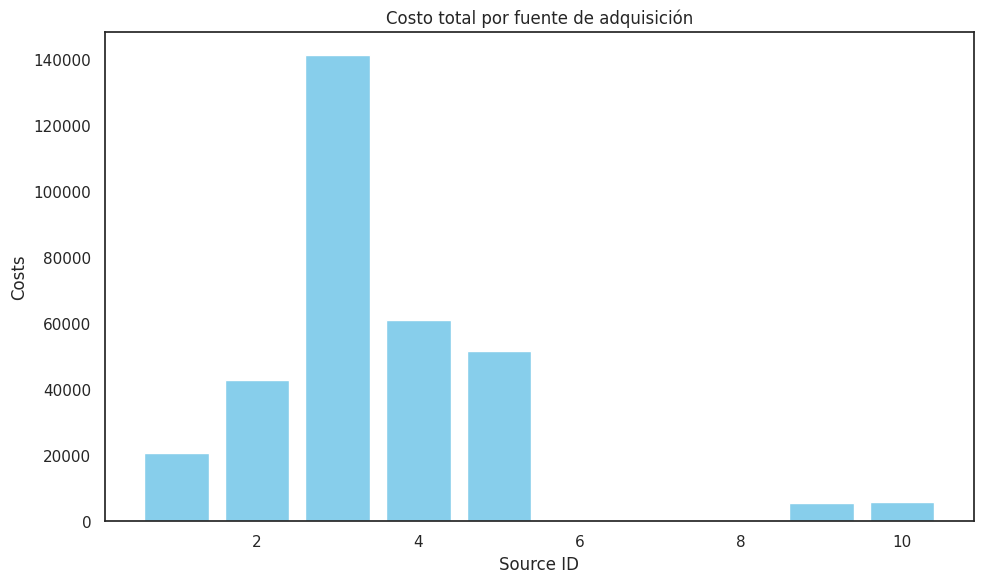

In [69]:
# Graficar cost_by_source
plt.figure(figsize=(10, 6))
plt.bar(cost_by_source['source_id'], cost_by_source['costs'], color='skyblue')
plt.xlabel('Source ID')
plt.ylabel('Costs')
plt.title('Costo total por fuente de adquisición')
plt.tight_layout()
plt.show()

In [70]:
# Dinero gastado a lo largo del tiempo
cost_over_time = df_costs.groupby('dt')['costs'].sum().reset_index()

In [71]:
print(f"Dinero gastado total: {total_cost}")
print('\n')
print("Dinero gastado por fuente de adquisición:")
print(cost_by_source)
print('\n')
print("Dinero gastado a lo largo del tiempo:")
print(cost_over_time)

Dinero gastado total: 329131.62


Dinero gastado por fuente de adquisición:
   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


Dinero gastado a lo largo del tiempo:
            dt    costs
0   2017-06-01   735.26
1   2017-06-02   721.19
2   2017-06-03   450.85
3   2017-06-04   761.16
4   2017-06-05   821.44
..         ...      ...
359 2018-05-27   532.87
360 2018-05-28   619.44
361 2018-05-29   784.79
362 2018-05-30  1183.00
363 2018-05-31  2153.70

[364 rows x 2 columns]


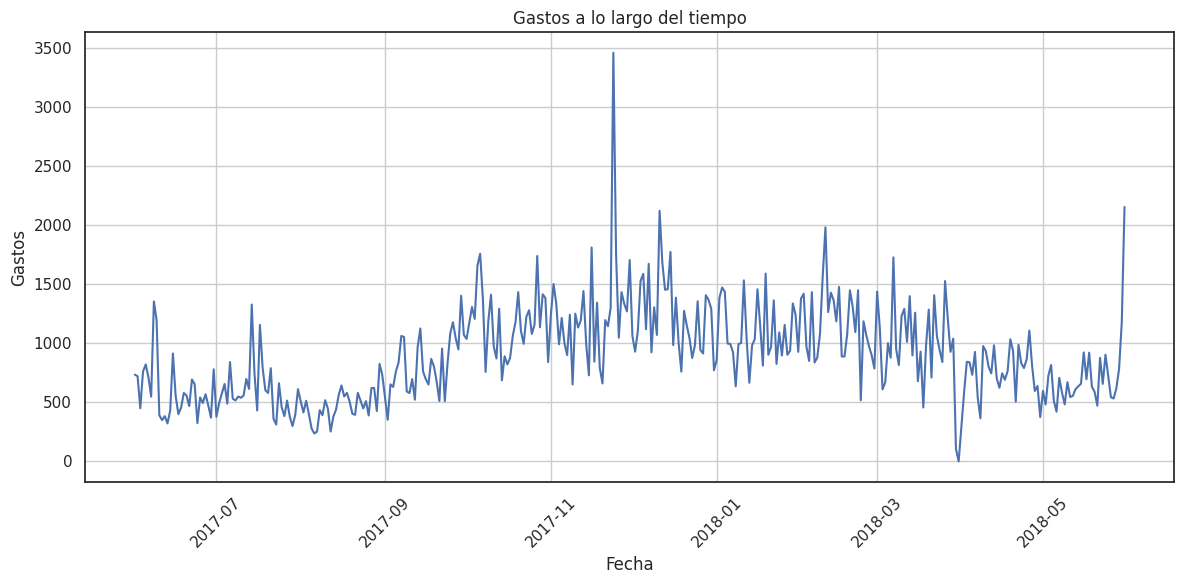

El valor máximo de costos es: 3458.8600000000006
Fecha correspondiente al valor máximo de costos: 2017-11-24 00:00:00


In [72]:
# Gráfico de gastos a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(cost_over_time['dt'], cost_over_time['costs'],  linestyle='-', color='b')
plt.xlabel('Fecha')
plt.ylabel('Gastos')
plt.title('Gastos a lo largo del tiempo')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Encontrar el valor máximo de 'costs'
max_cost = cost_over_time['costs'].max()

# Encontrar la fila correspondiente al máximo valor de 'costs'
max_cost_row = cost_over_time.loc[cost_over_time['costs'].idxmax()]

# Imprimir los resultados
print(f"El valor máximo de costos es: {max_cost}")
print(f"Fecha correspondiente al valor máximo de costos: {max_cost_row['dt']}")

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, muy bien!
</div>

#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?


In [73]:
# Unir df_visits y df_orders con base al 'uid' para obtener cuántos usuarios hicieron pedidos por fuente
df_merged = pd.merge(df_visits, df_orders, on='uid', how='left')

# Filtrar solo los usuarios que realizaron un pedido
df_customers = df_merged.dropna(subset=['buy_ts'])

# Contar cuántos clientes (usuarios únicos) fueron adquiridos por cada fuente
customers_by_source = df_customers.groupby('source_id')['uid'].nunique().reset_index()
customers_by_source.columns = ['source_id', 'num_customers']

# Unir con los costos por fuente
cac_by_source = pd.merge(cost_by_source, customers_by_source, on='source_id', how='left')

# Calcular el CAC por fuente
cac_by_source['CAC'] = cac_by_source['costs'] / cac_by_source['num_customers']

print("Costo de adquisición de clientes (CAC) por fuente de adquisición:")
print(cac_by_source[['source_id', 'CAC']])

Costo de adquisición de clientes (CAC) por fuente de adquisición:
   source_id        CAC
0          1   2.918642
1          2   5.859828
2          3  10.206676
3          4   4.284965
4          5   5.096209
5          9   1.975471
6         10   3.283976


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Cada comprador fue adquirido por una sola fuente, que es la fuente de la primera visita. Con el merge que realizaste, estás asignando todos los compradores de un mes a todas las fuentes por las que compraron, lo cual luego perjudica el cálculo del cac. Debes encontrar para cada usuario la fuente de su primera visita y con esta calcular el conteo de usuarios adquiridos por fuente. Además, si quieres hacerlo más preciso, debes hacer un cálculo del cac diario y luego con la media de este, asignar el cac de cada fuente.
</div>

<div class="alert alert-block alert-info">
<b>Lo corregimos a continuación:</b> <a class="tocSkip"></a>
</div>

In [74]:
# Encontrar la primera visita de cada usuario
first_visits = df_visits.sort_values(by='start_ts').groupby('uid').first().reset_index()

# Seleccionar las columnas necesarias
first_visits = first_visits[['uid', 'source_id', 'start_ts']]
first_visits.columns = ['uid', 'first_source_id', 'first_visit_ts']

print(first_visits.head())

               uid  first_source_id      first_visit_ts
0   11863502262781                3 2018-03-01 17:27:00
1   49537067089222                2 2018-02-06 15:55:00
2  297729379853735                3 2017-06-07 18:47:00
3  313578113262317                2 2017-09-18 22:49:00
4  325320750514679                5 2017-09-30 14:29:00


In [75]:
# Añadir una columna para el día de la primera visita
first_visits['first_visit_date'] = first_visits['first_visit_ts'].dt.date

# Contar el número de usuarios adquiridos por fuente y por día
users_acquired_per_day = first_visits.groupby(['first_visit_date', 'first_source_id']).size().reset_index(name='num_users')

print(users_acquired_per_day.head())

  first_visit_date  first_source_id  num_users
0       2017-06-01                1         47
1       2017-06-01                2         70
2       2017-06-01                3        180
3       2017-06-01                4        137
4       2017-06-01                5        111


In [76]:
df_costs['dt'] = df_costs['dt'].dt.date
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [77]:
# Unir los costos diarios con el conteo de usuarios adquiridos
merged_data = pd.merge(df_costs, users_acquired_per_day, left_on=['dt', 'source_id'], right_on=['first_visit_date', 'first_source_id'], how='left')

# Calcular el CAC diario (costo de adquisición de clientes)
merged_data['daily_cac'] = merged_data['costs'] / merged_data['num_users']

# Calcular el CAC promedio diario para cada fuente
average_cac = merged_data.groupby('source_id')['daily_cac'].mean().reset_index()
average_cac.columns = ['source_id', 'average_daily_cac']


print("Costo de adquisición de clientes (CAC) promedio diario por fuente de adquisición:")
print(average_cac)

Costo de adquisición de clientes (CAC) promedio diario por fuente de adquisición:
   source_id  average_daily_cac
0          1           2.320352
1          2           2.558062
2          3           2.166547
3          4           0.913705
4          5           1.077683
5          9           2.382554
6         10           1.111363


<div class="alert alert-block alert-info">
<b>Listo. </b> <a class="tocSkip"></a>
</div>

#### ¿Cuán rentables eran las inversiones? (ROMI)

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Corrige el CAC y luego veremos la revisión del ROMI.
</div>

In [79]:
# Ingresos totales por fuente de anuncios
revenue_by_source = df_customers.groupby('source_id')['revenue'].sum().reset_index()

# Unir ingresos y gastos por fuente de anuncios
financials_by_source = pd.merge(revenue_by_source, cost_by_source, on='source_id', how='left')


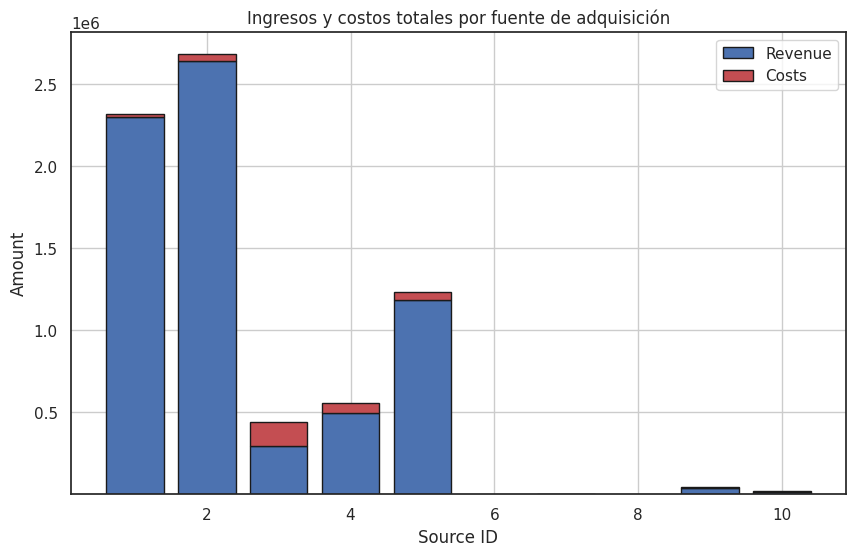

   source_id       revenue      costs
0          1  2.298200e+06   20833.27
1          2  2.638189e+06   42806.04
2          3  2.966880e+05  141321.63
3          4  4.966902e+05   61073.60
4          5  1.181477e+06   51757.10
5          7  1.220000e+00        NaN
6          9  3.634225e+04    5517.49
7         10  1.461923e+04    5822.49


In [94]:
# Ordenar el DataFrame por source_id
financials_by_source = financials_by_source.sort_values('source_id')

# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))

# Barra de ingresos
plt.bar(financials_by_source['source_id'], financials_by_source['revenue'], label='Revenue', color='b', edgecolor='k')

# Barra de costos
plt.bar(financials_by_source['source_id'], financials_by_source['costs'], label='Costs', color='r', edgecolor='k', bottom=financials_by_source['revenue'])

# Añadir títulos y etiquetas
plt.title('Ingresos y costos totales por fuente de adquisición')
plt.xlabel('Source ID')
plt.ylabel('Amount')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

print(financials_by_source)

Interesante lo que nos muestra esta gráfica:
- El canal al que más se le dedica inversión en marketing, es el tercero peor del que se registraron ingresos (retorno de la inversión).
- El canal que mejores registros de ingresos tiene, es el cuarto canal de marketing al que se le invierte capital. Y el segundo, con mejores ingresos es el tercero con más presupuesto.

Valdría la pena hacer reajustes en el presupuesto de marketing por canal, pero comprobémoslo calculando el CAC.

In [95]:
#Calcularemos el LTV por fuente de anuncios

# Unir financials por fuente de anuncios y numero de clientes por fuente
print(customers_by_source)
print(revenue_by_source)
ltv_by_source =  pd.merge(financials_by_source, customers_by_source, on='source_id', how='left')
print(ltv_by_source)

   source_id  num_customers
0          1           7138
1          2           7305
2          3          13846
3          4          14253
4          5          10156
5          7              1
6          9           2793
7         10           1773
   source_id       revenue
0          1  2.298200e+06
1          2  2.638189e+06
2          3  2.966880e+05
3          4  4.966902e+05
4          5  1.181477e+06
5          7  1.220000e+00
6          9  3.634225e+04
7         10  1.461923e+04
   source_id       revenue      costs  num_customers
0          1  2.298200e+06   20833.27           7138
1          2  2.638189e+06   42806.04           7305
2          3  2.966880e+05  141321.63          13846
3          4  4.966902e+05   61073.60          14253
4          5  1.181477e+06   51757.10          10156
5          7  1.220000e+00        NaN              1
6          9  3.634225e+04    5517.49           2793
7         10  1.461923e+04    5822.49           1773


In [90]:
metrics_by_source =  pd.merge(financials_by_source, average_cac, on='source_id', how='left')
print(metrics_by_source)

   source_id       revenue      costs  average_daily_cac
0          1  2.298200e+06   20833.27           2.320352
1          2  2.638189e+06   42806.04           2.558062
2          3  2.966880e+05  141321.63           2.166547
3          4  4.966902e+05   61073.60           0.913705
4          5  1.181477e+06   51757.10           1.077683
5          7  1.220000e+00        NaN                NaN
6          9  3.634225e+04    5517.49           2.382554
7         10  1.461923e+04    5822.49           1.111363


In [82]:
ltv_by_source['ltv_by_source'] = ltv_by_source['revenue'] / ltv_by_source['num_customers']
ltv_by_source['cac_by_source'] = ltv_by_source['costs'] / ltv_by_source['num_customers']
ltv_by_source['romi'] = ltv_by_source['ltv_by_source'] / ltv_by_source['cac_by_source']

print(ltv_by_source)

   source_id       revenue      costs  num_customers  ltv_by_source  \
0          1  2.298200e+06   20833.27           7138     321.966961   
1          2  2.638189e+06   42806.04           7305     361.148420   
2          3  2.966880e+05  141321.63          13846      21.427702   
3          4  4.966902e+05   61073.60          14253      34.848114   
4          5  1.181477e+06   51757.10          10156     116.332920   
5          7  1.220000e+00        NaN              1       1.220000   
6          9  3.634225e+04    5517.49           2793      13.011905   
7         10  1.461923e+04    5822.49           1773       8.245477   

   cac_by_source        romi  
0       2.918642  110.313944  
1       5.859828   61.631237  
2      10.206676    2.099381  
3       4.284965    8.132649  
4       5.096209   22.827344  
5            NaN         NaN  
6       1.975471    6.586736  
7       3.283976    2.510821  


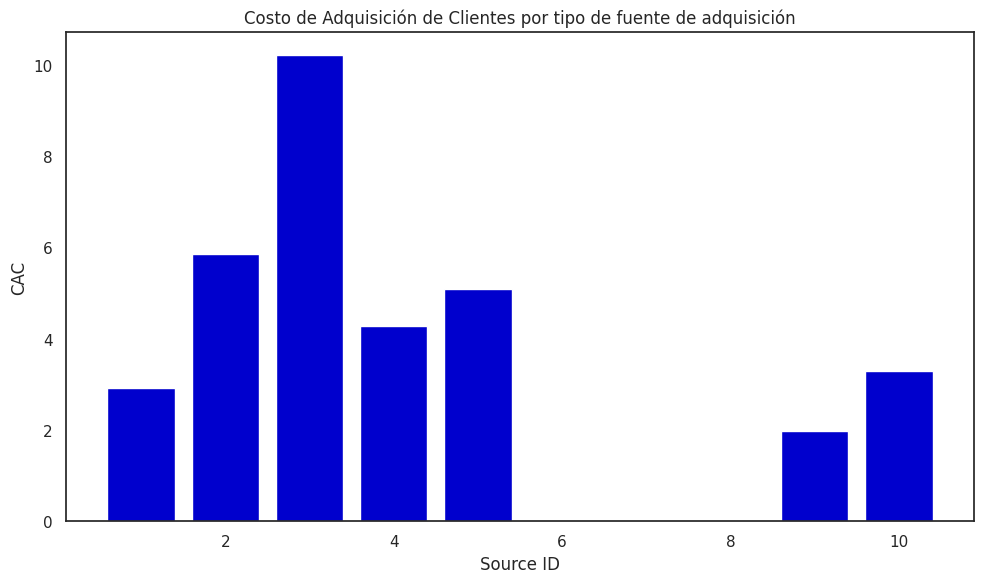

In [83]:
# Graficar CAC por fuente de adquisición 
plt.figure(figsize=(10, 6))
plt.bar(ltv_by_source['source_id'], ltv_by_source['cac_by_source'], color = 'mediumblue')
plt.xlabel('Source ID')
plt.ylabel('CAC')
plt.title('Costo de Adquisición de Clientes por tipo de fuente de adquisición')
plt.tight_layout()
plt.show()

In [84]:
print("Rentabilidad de las inversiones (ROMI) por fuente de adquisición:")
print(ltv_by_source[['source_id', 'romi']])

Rentabilidad de las inversiones (ROMI) por fuente de adquisición:
   source_id        romi
0          1  110.313944
1          2   61.631237
2          3    2.099381
3          4    8.132649
4          5   22.827344
5          7         NaN
6          9    6.586736
7         10    2.510821


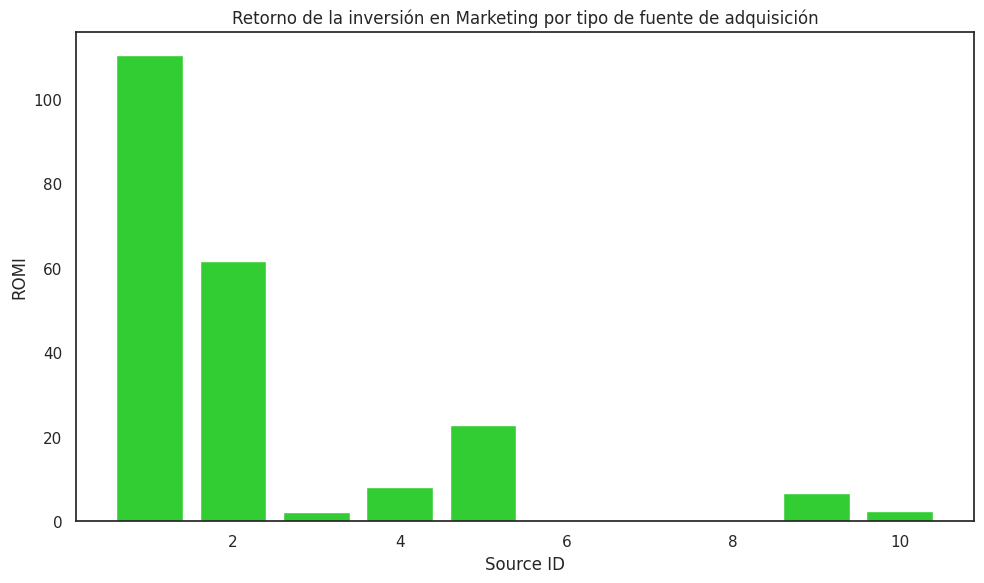

In [85]:
# Graficar ROMI por fuente de adquisición 
plt.figure(figsize=(10, 6))
plt.bar(ltv_by_source['source_id'], ltv_by_source['romi'], color = 'limegreen')
plt.xlabel('Source ID')
plt.ylabel('ROMI')
plt.title('Retorno de la inversión en Marketing por tipo de fuente de adquisición')
plt.tight_layout()
plt.show()

Es muy evidente cuál es el canal de mejor retorno de la inversión en marketing. Este gráfico se habla con el de 'Ingresos y costos por fuente de adquisición'.

Serán necesarios un par de reajustes en el presupuesto de marketing por fuente de adquisición.

## Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

Después de analizar los datos de visitas, pedidos e inversiones(costos) en marketing, hemos calculado varias métricas clave que nos permiten evaluar la efectividad de las distintas fuentes de adquisición. Nos hemos centrado en las siguientes métricas:

- Costo Total y Costo por Fuente de Adquisición
- Costo de Adquisición de Clientes (CAC) por Fuente 
- Retorno de la Inversión en Marketing (ROMI) por Fuente 

Hemos optado por estas métricas ya que nos permiten un panorama amplio de las fuentes de adquisición.
Un CAC más bajo es preferible, ya que significa que se está gastando menos dinero para adquirir cada cliente.
Y el ROMI ya que esta métrica nos muestra cuánto se gana por cada dólar gastado en marketing.

### Recomendaciones de Inversión


#### Inversiones en Fuentes con Mejor ROMI:

- Fuente 1: Tiene el ROMI más alto, indicando que genera más ingresos en comparación con los gastos. Recomiendo aumentar la inversión en esta fuente, ya que maximiza los ingresos por cada dólar invertido. (actualmente ocupa el 4to puesto en el presupuesto de inversión)
- Fuente 2: También presenta un buen ROMI, aunque no tan alto como Fuente 1. Esta fuente sigue siendo rentable y debería recibir una inversión sostenida. (actualmente ocupa el 3er puesto en el presupuesto de inversión)


#### Revisión y Optimización de Fuentes con Bajo ROMI:

- Fuente 3: Presenta un ROMI bajo. Es crucial revisar las campañas y estrategias asociadas a esta fuente. Si no se pueden optimizar para mejorar el ROMI, recomiendo reducir la inversión en esta fuente, ya que es la fuente que más inversión en marketing ha recibido.
- Fuente 4: Similar a la Fuente 3, si no se pueden realizar ajustes que mejoren el rendimiento, debería considerarse una reducción en la inversión.


#### Ajuste Basado en CAC:

- Fuente 5: Tiene un CAC relativamente bajo, lo que significa que está adquiriendo clientes a un costo menor que otras fuentes. El ROMI es positivo, es el tercero mejor de las diferentes fuentes, por lo que aumentar la inversión aquí también puede ser beneficioso.
- Fuente 9: Tiene el CAC más bajo de todos, y el ROMI sigue siendo positivo, es una buena fuente para adquirir clientes de alto valor.


# Conclusión Final #

Para maximizar el retorno de la inversión y mejorar la eficiencia del gasto en marketing, recomiendo enfocar las inversiones en fuentes que han demostrado ser más rentables (alto ROMI) y optimizar o reducir gastos en aquellas que no están generando retornos adecuados. Además, monitorizar continuamente estas métricas permitirá ajustar las estrategias en tiempo real, asegurando que el presupuesto de marketing se utilice de manera más efectiva.

En resumen, incrementar la inversión en fuentes con alto ROMI y bajo CAC mientras se optimizan o eliminan las inversiones en fuentes menos efectivas permitirá una mayor rentabilidad y eficiencia en las campañas de marketing.